# Ass-5 [Top Industries]
Given File 'startup_funding.csv' Problem Statement : Which type of companies got more easily funding. To answer this question, find - Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only) Print the industry name and percentage of the amount funded with 2 decimal place after rounding off. Note : Ecommerce is the right word in IndustryVertical, so correct it. Print the industry in descending order with respect to the percentage of the amount funded. Output Format : industry1 percent1 industry2 percent2 industry3 percent3 . . .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/HP/Desktop/Case Study-Startup/startup_funding2.csv")
df = data.copy()

In [2]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
# handle missing values in IndustryVertical
df.drop(df.index[df.IndustryVertical.isnull()], inplace = True)

In [4]:
# Ecommerce is the right word in IndustryVertical
df.loc[df.IndustryVertical == 'ecommerce', 'IndustryVertical'] = 'Ecommerce'
df.loc[df.IndustryVertical == 'ECommerce', 'IndustryVertical'] = 'Ecommerce'
df.loc[df.IndustryVertical == 'eCommerce', 'IndustryVertical'] = 'Ecommerce'



industry = []
for i in df.IndustryVertical:
    industry.append(i)

In [5]:
# replace NaN values with 0 in amount column
df.loc[df.AmountInUSD.isnull(), 'AmountInUSD'] = '0'

amount = []
for i in df.AmountInUSD:
    amount.append(i)
#handle space
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
    

In [6]:
np_amount = np.array(amount, dtype = 'int64')
np_industry = np.array(industry)
Dic = {}
for i in range(len(np_industry)):
    if np_industry[i] in Dic:
        Dic[np_industry[i]] += np_amount[i]
    else:
        Dic[np_industry[i]] = np_amount[i]

In [7]:
x = list(Dic.keys())
y = list(Dic.values())
np_x = np.array(x)
np_y = np.array(y)

# sort np_x using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

In [8]:
np_x = np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y = np_y[len(np_y)-1:len(np_y)-1-5:-1]
print(np_x)
print(np_y)

['Ecommerce' 'Consumer Internet' 'Technology' 'Online Marketplace'
 'E-Commerce & M-Commerce platform']
[4281189608 3797089000 1103593500  700000000  680000000]


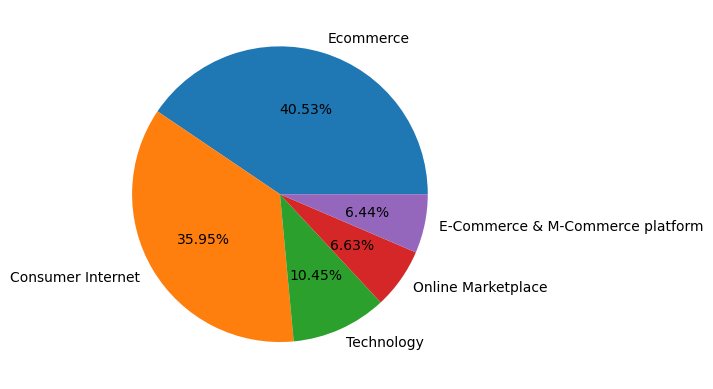

In [9]:
plt.pie(np_y, labels = np_x, autopct = '%.2f%%')
plt.show()

In [10]:
for i in range(len(np_x)):
    print(np_x[i], format(np_y[i]*100/sum(np_y), '.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


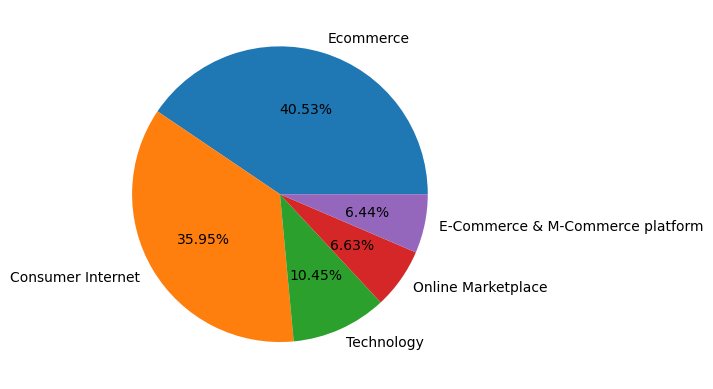

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [11]:
plt.pie(np_y, labels = np_x, autopct = '%.2f%%')
plt.show()
for i in range(len(np_x)):
    print(np_x[i], format(np_y[i]*100/sum(np_y), '.2f'))

# Ass-6 [Top startups]
Given File 'startup_funding.csv' Problem Statement : Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note: Ola, Flipkart, Oyo, Paytm are important startups, so correct their names.

There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format : startup1 startup2 startup3 . . .

In [12]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [16]:
for i in df['StartupName'].unique():
    print(i,end =' ')

TouchKin Ethinos Leverage Edu Zepo Click2Clinic Billion Loans Ecolibriumenergy Droom Jumbotail Moglix Timesaverz Minjar MyCity4kids Clip App Upwardly.in Autorox.co Fabogo Flickstree Design Cafe Innoviti VDeliver Bottr.me Arcatron QwikSpec Chumbak Increff Vayana MObiquest Ambee Ideal Insurance Hypernova Interactive Rentomojo AirCTO Playablo Trupay Brick2Wall FableStreet Monsoon Fintech MonkeyBox Noticeboard Byju’s Creator’s Gurukul Fab Hotels ThinkerBell 1mg Jhakaas BigStylist Gympik.com Tripeur RentOnGo Goomo MaxMyWealth Spinny Healthbuds Ftcash BHIVE Workspace wayForward GyanDhan Hungry Foal ZipLoan GrowFitter Stratfit Multiplier Solutions ABI Health Stockal Guidoo eSahai.in Loanmeet LendingKart Boxx.ai PeeSafe.in Vista Rooms CoverFox HyperTrack Goodera Digit Ola Vanitycask MrNeeds MoneyTap Goodbox Fincash PortDesk EdgeFx EazyDiner HealthIntel Unbxd DarwinBox ForeverShop Insider.in Fynd Grow Fit Fabulyst mSwipe OneAssist Julia Computing Kissht Explore Life traveling Loantap Voxweb HUG

In [18]:
# find NaN values in AmountInUSD column and fill with '0'
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'

np_amount = np.array(df.AmountInUSD)
np_startup = np.array(df.StartupName)

#handle space
for i in range(len(np_amount)):
    np_amount[i] = ''.join(np_amount[i].split(','))
    
np_amount = np.array(np_amount, dtype = 'int64')

C:\Users\HP\AppData\Local\Temp\ipykernel_2356\2938708250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'


In [19]:
# correct spelling mistake in startup
for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'

In [20]:
Dict = {}
for i in range(len(np_amount)):
    if np_startup[i] in Dict.keys():
        Dict[np_startup[i]] += np_amount[i]
    else:
        Dict[np_startup[i]] = np_amount[i]

In [21]:
x = []
y = []
for val in Dict:
    x.append(val)
    y.append(Dict[val])

np_x = np.array(x)
np_y = np.array(y)

In [22]:
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

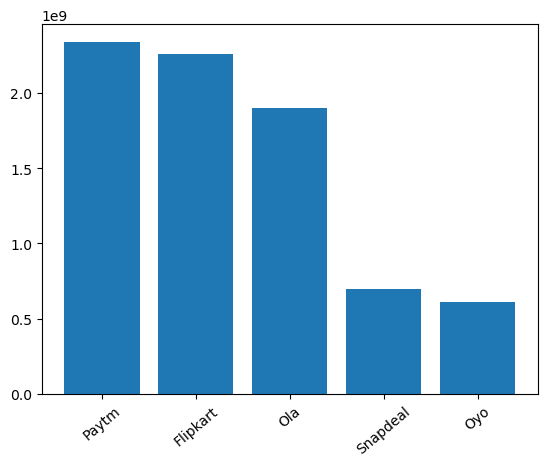

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [23]:
#find top 5 most startup
np_x = np_x[len(np_x)-1: len(np_x)-1-5:-1]
np_y = np_y[len(np_y)-1: len(np_y)-1-5:-1]

#create bar chart
plt.bar(np_x, np_y)
plt.xticks(rotation = 40)
plt.show()

for i in range(len(np_x)):
    print(np_x[i])

# Ass-7 [Funding rounds]
Given File 'startup_funding.csv' Problem Statement : Find the top 5 startups who received the most number of funding rounds.

That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to

the number of funding round as integer value.

Note: Ola, Flipkart, Oyo, Paytm are important startups, so correct their names.

There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format : startup1 number1 startup2 number2 startup3 number3 . . .

In [24]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [25]:
df.StartupName.dropna(inplace = True)

In [27]:
np_strtup = np.array(df.StartupName)

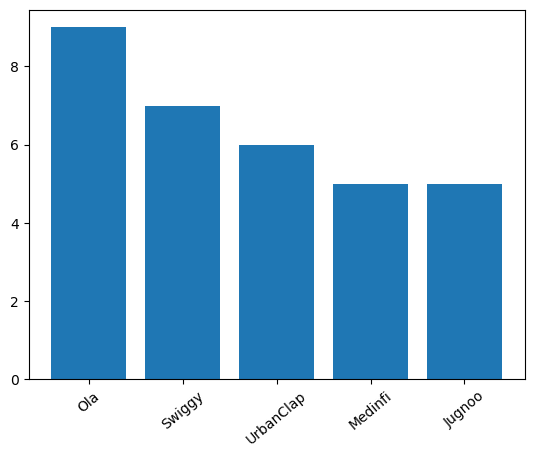

Ola 9
Swiggy 7
UrbanClap 6
Medinfi 5
Jugnoo 5


In [40]:
#correct spelling mistake in startup
np_startup = np.array(df.StartupName)

for i in range(len(np_startup)):
    
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
        
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
        
    if 'Oyo' in np_startup[i] or 'OYO Rooms' in np_startup[i]:
        np_startup[i]='Oyo'
        
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'
        
Dict = {}
for key in np_startup:
    if key in Dict:
        Dict[key] += 1
    else:
        Dict[key] = 1
        
x = list(Dict.keys())
y = list(Dict.values())

np_x = np.array(x)
np_y = np.array(y)

# sort the np_x using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

#find top 5 most startup
np_x = np_x[len(np_x)-1: len(np_x)-1-5:-1]
np_y = np_y[len(np_y)-1: len(np_y)-1-5:-1]

plt.bar(np_x, np_y)
plt.xticks(rotation = 40)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])

# Ass-8 [Top Investor]
Given File 'startup_funding.csv'

Problem Statement :

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:

In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.

Output Format : investorname number

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/HP/Desktop/Case Study-Startup/startup_funding2.csv")
df = data.copy()

In [42]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [44]:
df.InvestorsName.dropna(inplace = True)

In [45]:
df.InvestorsName.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2372 entries, 0 to 2371
Series name: InvestorsName
Non-Null Count  Dtype 
--------------  ----- 
2364 non-null   object
dtypes: object(1)
memory usage: 18.7+ KB


In [48]:
df.InvestorsName.unique()

array(['Kae Capital', 'Triton Investment Advisors',
       'Kashyap Deorah, Anand Sankeshwar, Deepak Jain, Sadashiva NT, Arjun Mehta, Satish Kaul, Anindya Ghose',
       ..., 'KARSEMVEN Fund', 'Exfinity Fund, GrowX Ventures.',
       'UK based Group of Angel Investors'], dtype=object)

In [49]:
np_invname = np.array(df.InvestorsName, dtype = 'str') 
investors = []
for row in np_invname:
    if 'Undisclosed' not in row or 'undisclosed' in row:
        val = row.split(',')
        for name in val:
            investors.append(name.strip())
len(investors)

4467

In [50]:
dict8 = {}
for i in range(len(investors)):
    if investors[i] in dict8.keys():
        dict8[investors[i]] += 1
    else:
        dict8[investors[i]] = 1

In [55]:
dict8

{'Kae Capital': 22,
 'Triton Investment Advisors': 1,
 'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 17,
 'LetsVenture': 17,
 'Anupam Mittal': 18,
 'Hetal Sonpal': 1,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Infuse Ventures': 8,
 'JLL': 2,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 44,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 52,
 'Jungle Ventures': 13,
 'Shailesh Rao': 1,
 'Venture Highway': 3,
 'BCCL': 1,
 'Blume Ventures': 39,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 4,
 'Ashish Gupta': 6,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'nan': 8,
 'India Quotient': 21,
 'Shunwei Capital': 3,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures':

In [56]:
x = list(dict8.keys())
y = list(dict8.values())

np_x = np.array(x)
np_y = np.array(y)

# sort the np_x using np_y
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)
print(np_x[-1], np_y[-1])

Sequoia Capital 64


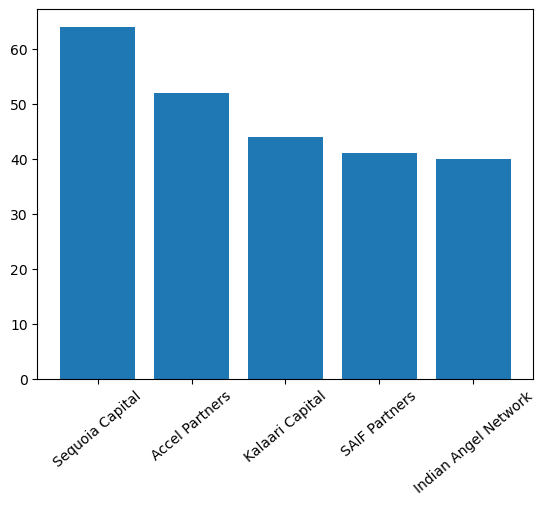

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [57]:
np_x = np_x[len(np_x)-1: len(np_x)-1-5:-1]
np_y = np_y[len(np_y)-1: len(np_y)-1-5:-1]

plt.bar(np_x, np_y)
plt.xticks(rotation = 40)
plt.show()

for i in range(len(np_x)):
    print(np_x[i], np_y[i])